In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Forzar uso de CPU

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2025-05-29 12:03:01.247483: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 12:03:01.342451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748530981.372184 3766740 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748530981.383350 3766740 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 12:03:01.412861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Cargar datos
X_train = np.load('../Datasets_DeepShadows/array_images/X_train.npy')
y_train = np.load('../Datasets_DeepShadows/Galaxies_data/y_train.npy')
X_val = np.load('../Datasets_DeepShadows/array_images/X_val.npy')
y_val = np.load('../Datasets_DeepShadows/Galaxies_data/y_val.npy')

In [4]:
# Modelo optimizado para CPU
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/home/luisangel/.conda/envs/luis_env_v2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 12:04:03.079297: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-29 12:04:03.079502: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: valkiria
2025-05-29 12:04:03.079512: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: valkiria
2025-05-29 12:04:03.079696: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 470.

In [5]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenamiento
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.8527 - loss: 0.3382 - val_accuracy: 0.9224 - val_loss: 0.2096
Epoch 2/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9269 - loss: 0.2012 - val_accuracy: 0.9240 - val_loss: 0.2154
Epoch 3/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9337 - loss: 0.1846 - val_accuracy: 0.9208 - val_loss: 0.2280
Epoch 4/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9330 - loss: 0.1775 - val_accuracy: 0.9309 - val_loss: 0.1852
Epoch 5/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9370 - loss: 0.1734 - val_accuracy: 0.9238 - val_loss: 0.2071
Epoch 6/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9425 - loss: 0.1600 - val_accuracy: 0.9156 - val_loss: 0.2260
Epoch 7/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9431 - loss: 0.1525 - val_accuracy: 0.9369 - val_loss: 0.1776
Epoch 8/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9439 - loss: 0.1501 - 

Plot the history (Accuracy and Loss as a function of Epoch).

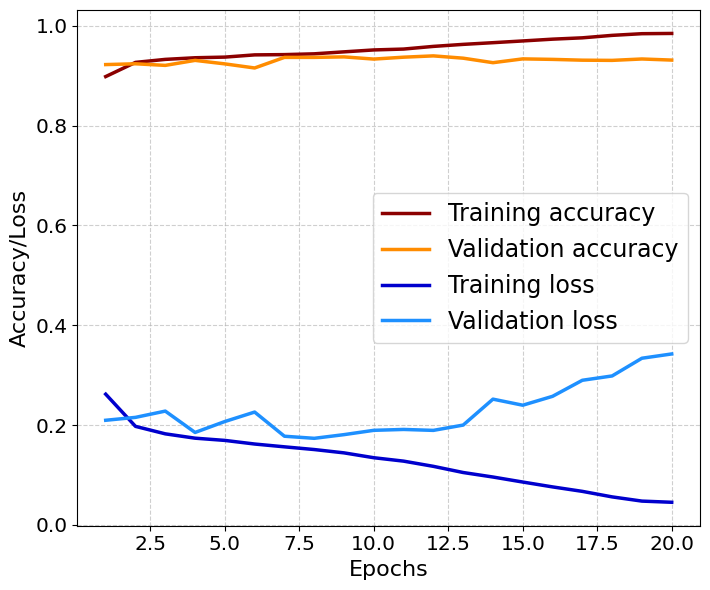

In [11]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = model.history.history
n_epochs = len(history_dict['accuracy'])
Epochs = np.arange(1, n_epochs+1)

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_err = 1.0 - np.asarray(train_acc)
val_err = 1.0 - np.asarray(val_acc)

plt.figure(figsize=(7.2, 6.0))
plt.plot(Epochs, train_acc, c='darkred', linewidth=2.5, label='Training accuracy')
plt.plot(Epochs, val_acc, c='darkorange', linewidth=2.5, label='Validation accuracy')
plt.plot(Epochs, train_loss, c='mediumblue', linewidth=2.5, label='Training loss')
plt.plot(Epochs, val_loss, c='dodgerblue', linewidth=2.5, label='Validation loss')
plt.grid(ls='--', alpha=0.6)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy/Loss', fontsize=16)
#plt.xlim(1, n_epochs)
#plt.ylim(0.2, 1)
plt.legend(frameon=True, loc='center right', fontsize=17)
plt.tick_params(axis='both', labelsize=14.5)
plt.tight_layout()
plt.show()

In [16]:
X_test = np.load('../Datasets_DeepShadows/array_images/X_test.npy')
y_test = np.load('../Datasets_DeepShadows/Galaxies_data/y_test.npy')

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Predicción de probabilidades
y_pred_prob = model.predict(X_test)  # shape (n, 1) para binario
y_pred_DL = (y_pred_prob > 0.5).astype("int32").flatten()

# Métricas
print("Accuracy score for DL:", accuracy_score(y_test, y_pred_DL))
print("Precision score for DL:", precision_score(y_test, y_pred_DL))
print("Recall score for DL:", recall_score(y_test, y_pred_DL))
print("AUC score for DL (from probabilities):", roc_auc_score(y_test, y_pred_prob))

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy score for DL: 0.9347782460365242
Precision score for DL: 0.9297989031078611
Recall score for DL: 0.9502989536621823
AUC score for DL (from probabilities): 0.9654139639998627


### Plot confusion matrix

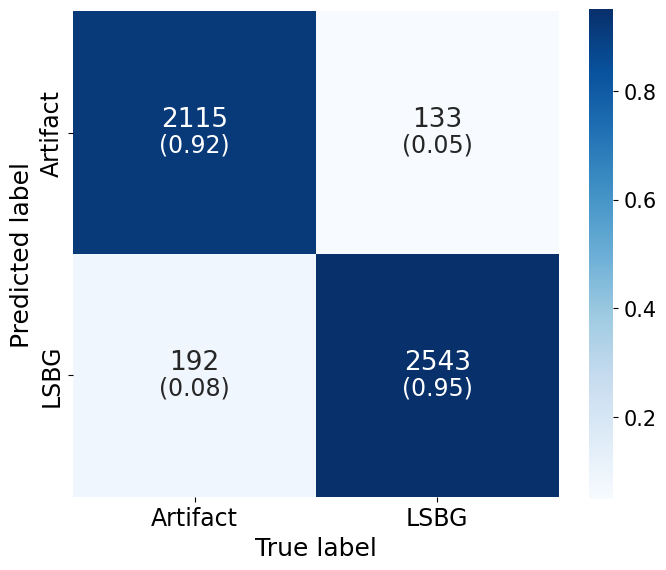

In [25]:
# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

# Get the confusion matrix for the Deep Learning
con_mat_DL = confusion_matrix(y_test, y_pred_DL)

# Get annotations and normalized confusion matrix
a = con_mat_DL[0]/np.sum(con_mat_DL[0])
b = con_mat_DL[1]/np.sum(con_mat_DL[1])


con_mat_normalized = np.zeros([2,2])
con_mat_normalized[0] = a
con_mat_normalized[1] = b

# Annotations
an_1 = "("+"{:.2f}".format(a[0])+")"
an_2 = "("+"{:.2f}".format(a[1])+")"
an_3 = "("+"{:.2f}".format(b[0])+")"
an_4 = "("+"{:.2f}".format(b[1])+")"

annots = np.zeros([2,2],dtype='U6')

annots[0,0] = an_1;annots[0,1] = an_2
annots[1,0] = an_3;annots[1,1] = an_4

class_names = ['Artifact','LSBG']
# ==============================================
# ==============================================


plt.figure(figsize = (7,6.0))
g =sns.heatmap(con_mat_DL.T, square = True, annot=True,annot_kws={'va':'bottom',"size": 19},fmt='.0f', cmap='Blues', cbar=False, 
           xticklabels= class_names,
           yticklabels= class_names)
sns.heatmap(con_mat_normalized.T, square=True, annot=annots.T, annot_kws={'va':'top',"size": 17},cmap='Blues',fmt='', cbar=True,
            cbar_kws={'shrink':0.94})
g.set_xticklabels(class_names, fontsize = 17)
g.set_yticklabels(class_names, fontsize = 17)

# Ticks for colorbar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
# =========================================
# =========================================
plt.xlabel('True label',fontsize=18)
plt.ylabel('Predicted label',fontsize=18)

plt.tight_layout()
plt.savefig("../Conf_matrix_DL.pdf")
#files.download("/content/drive/My Drive/Plots/Conf_matrix_DL.pdf")
plt.show()

In [37]:
print(len(y_test[(y_test==0.0)&(y_pred_DL==1)]))

192


### Plot probabilities

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


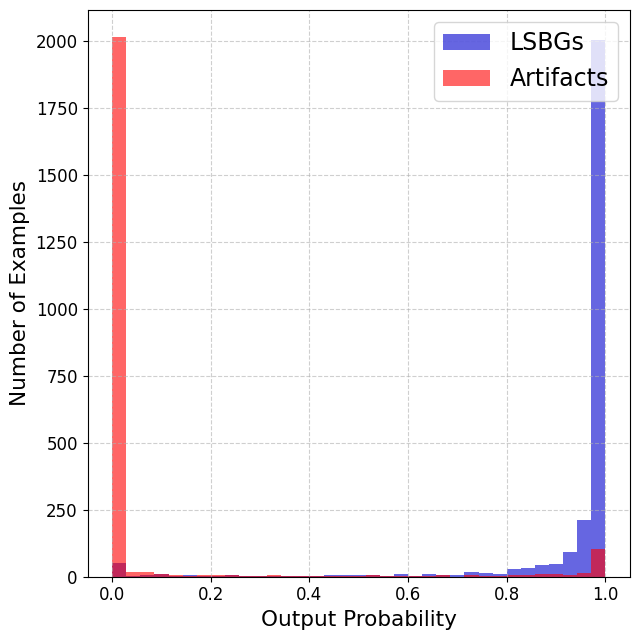

In [27]:
# First let's predict probabilities on the test set
scores_DL = model.predict(X_test)

plt.figure(figsize = (6.5,6.5))


plt.hist(scores_DL[y_test==1.0],range=[0,1],bins=35,color='mediumblue',alpha=0.6,density=False,label='LSBGs')
plt.hist(scores_DL[y_test==0.0],range=[0,1],bins=35,color='red',alpha=0.6,density=False,label='Artifacts')
# ==============================================================================
# ==============================================================================
plt.grid(ls='--',alpha=0.6)
plt.tick_params(axis='both', labelsize=12)
plt.legend(frameon=True, loc='upper right', fontsize=17)

plt.xlabel("Output Probability", fontsize=15.5)
plt.ylabel("Number of Examples", fontsize=15.5)

plt.tight_layout()
#plt.savefig("/content/drive/My Drive/Plots/DL_probas.pdf")
#files.download("/content/drive/My Drive/Plots/DL_probas.pdf")
plt.show()
     

Misclassification Examples

Now, let's plot some misclassification Examples.

Actually get Artefacts classified as LSBGs with probability
and LSBGs classified as Artefacts (probability ).

In [39]:
X_misc_Art = X_test[(scores_DL[:,0]>0.8)&(y_test==0.0)] #Artefacts classified as LSBGs
X_misc_LSBG = X_test[(scores_DL[:,0]<0.2)&(y_test==1.0)] #LSBGs classified as Artefacts
# ==============================================================================
# ==============================================================================
# Get probabilities/scores 
P_misc_Art = scores_DL[(scores_DL[:,0]>0.8)&(y_test==0.0)] #Artefacts classified as LSBGs
P_misc_LSBG = scores_DL[(scores_DL[:,0]<0.2)&(y_test==1.0)] #LSBGs classified as Artefacts
# ==============================================================================
# ==============================================================================
# Print numbers of each one
print(len(P_misc_Art),len(P_misc_LSBG))

158 87


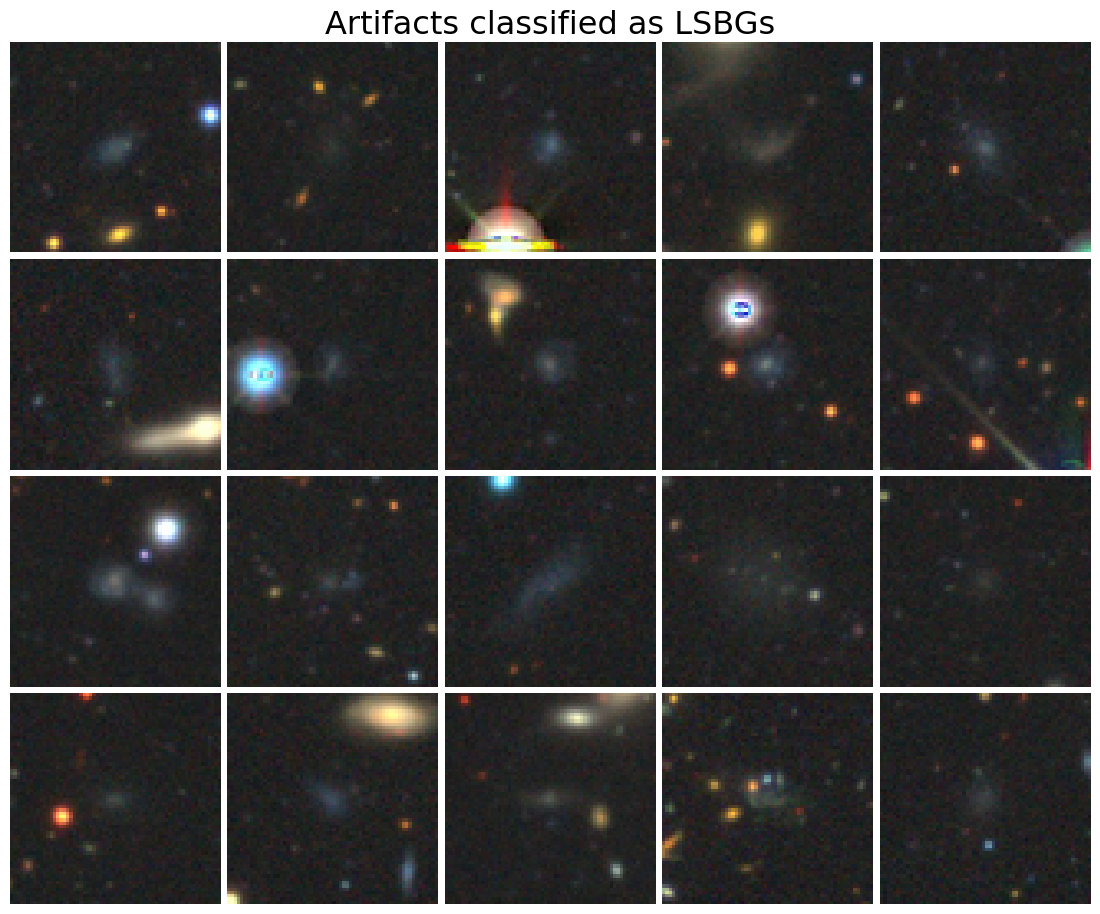

In [40]:
# Plot them
n_rows = 4
n_cols = 5

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_rows*n_cols):
    if (i==3):
        plt.title("Artifacts classified as LSBGs",fontsize=23)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_misc_Art[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.03)
#plt.tight_layout()
#plt.savefig("/content/drive/My Drive/Plots/Misclass_Art_Examples.pdf")
#files.download("/content/drive/My Drive/Plots/Misclass_Art_Examples.pdf")
plt.show()

     

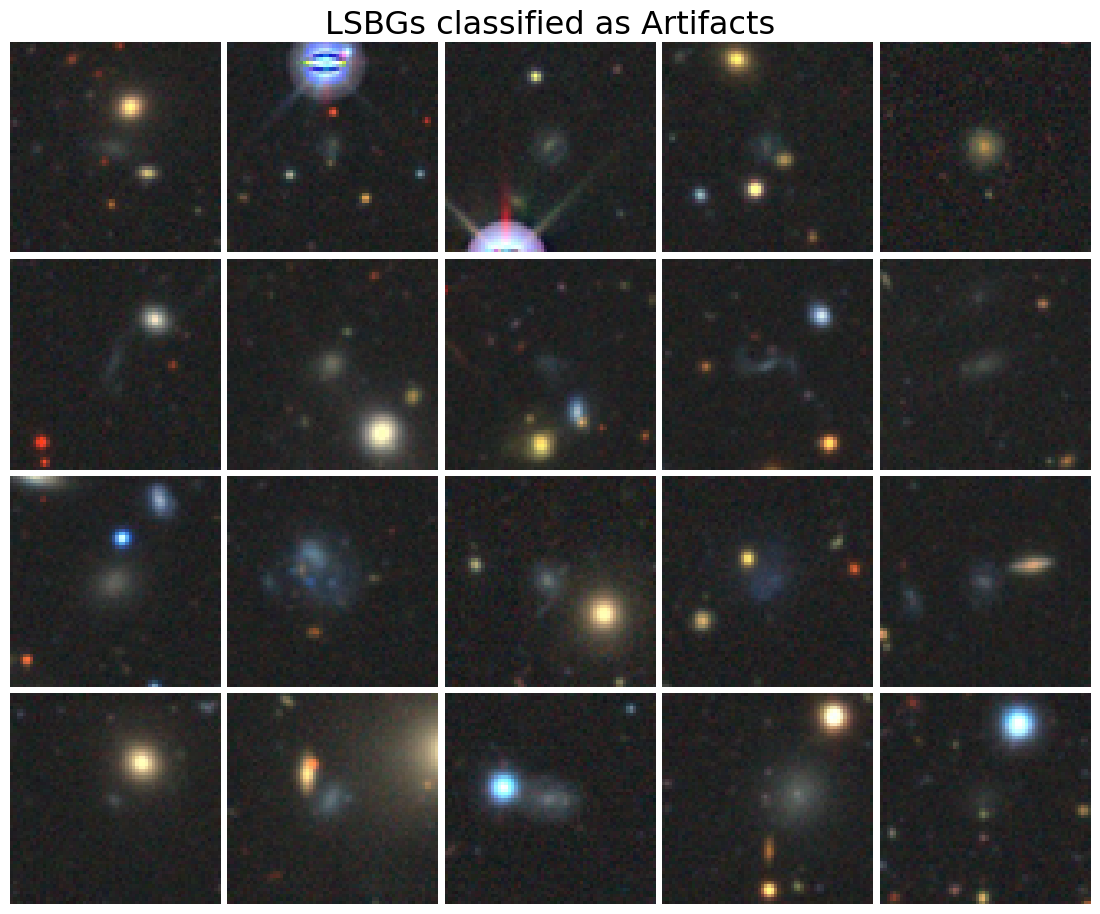

In [42]:

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_rows*n_cols):
    if (i==3):
        plt.title("LSBGs classified as Artifacts",fontsize=23)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_misc_LSBG[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.03)
#plt.tight_layout()
#plt.savefig("/content/drive/My Drive/Plots/Misclass_LSBG_Examples.pdf")
#files.download("/content/drive/My Drive/Plots/Misclass_LSBG_Examples.pdf")
plt.show()
     
     

Correct classification examples with low probability

LSBGs with 0.5<P<0.6



Artefacts with 0.4<P<0.5

In [43]:
X_corr_Art = X_test[(scores_DL[:,0]>0.4)&(scores_DL[:,0]<0.5)&(y_test==0.0)] #Artifacts classified as LSBGs
X_corr_LSBG = X_test[(scores_DL[:,0]>0.5)&(scores_DL[:,0]<0.6)&(y_test==1.0)] #LSBGs classified as LSBGs
# ==============================================================================
# ==============================================================================
# Get probabilities/scores 
P_corr_Art = scores_DL[(scores_DL[:,0]>0.4)&(scores_DL[:,0]<0.5)&(y_test==0.0)] #Artifacts classified as Artefacts
P_corr_LSBG = scores_DL[(scores_DL[:,0]>0.5)&(scores_DL[:,0]<0.6)&(y_test==1.0)] #LSBGs classified as LSBGs
# ==============================================================================
# ==============================================================================
# Print numbers of each one
print(len(P_corr_Art),len(P_corr_LSBG))

9 22


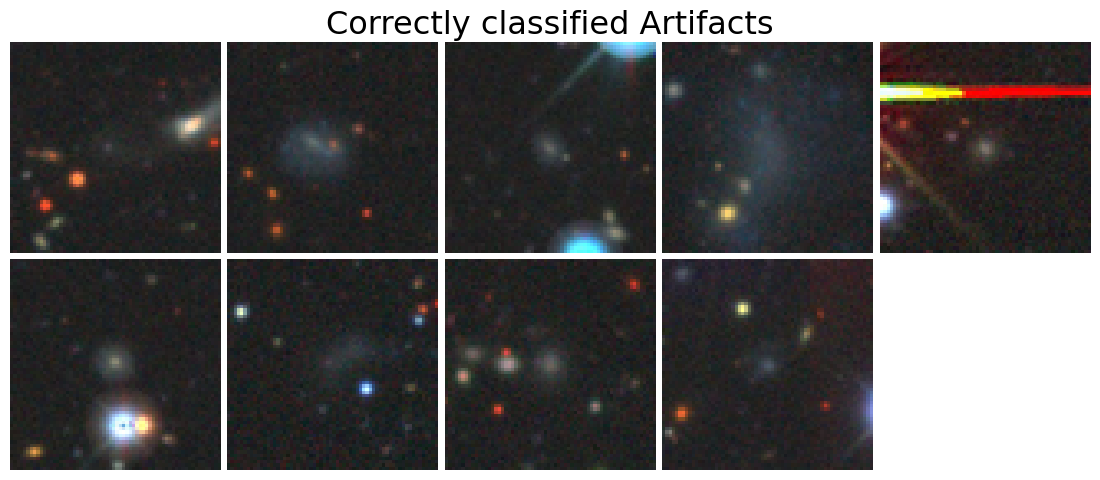

In [45]:
n_images = len(X_corr_Art)
n_plot = min(n_rows * n_cols, n_images)

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_plot):
    if i == 3:
        plt.title("Correctly classified Artifacts", fontsize=23)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_corr_Art[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.03)
plt.show()


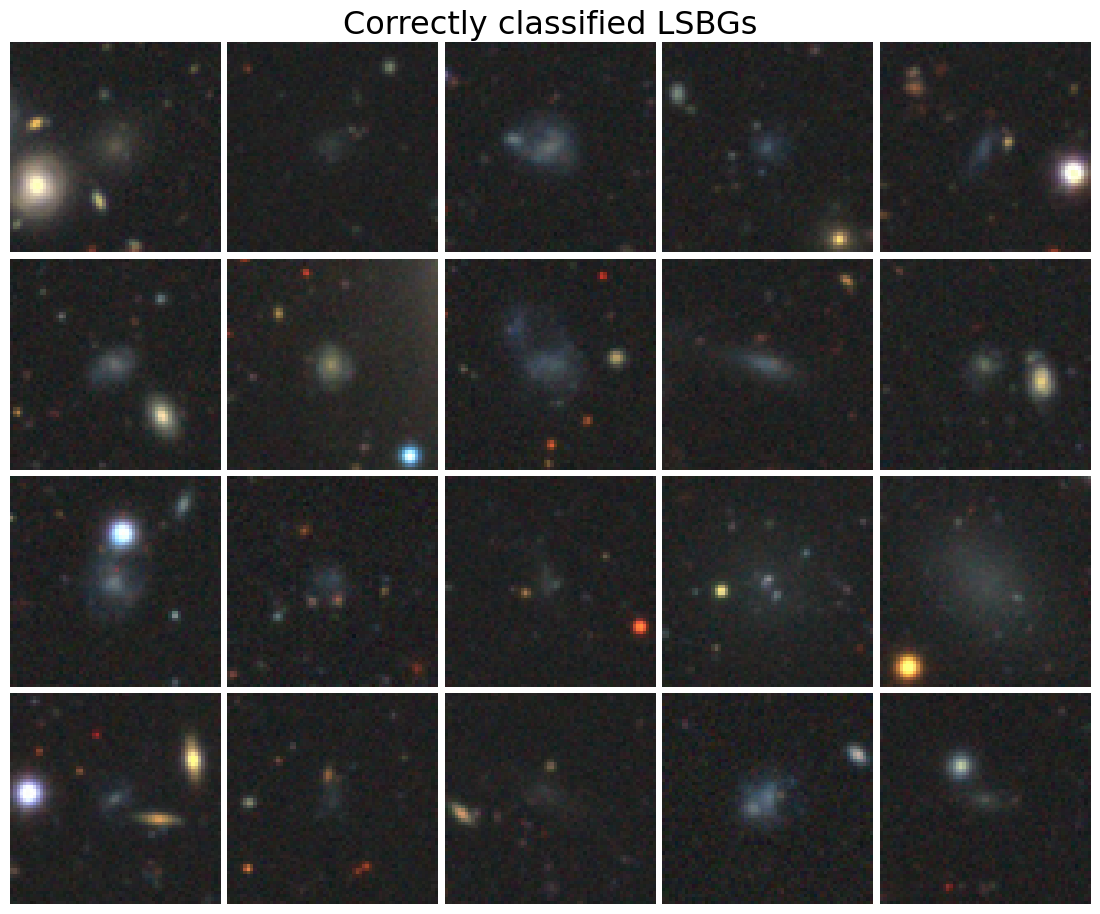

In [46]:
n_images = len(X_corr_LSBG)
n_plot = min(n_rows * n_cols, n_images)

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_plot):
    if i == 3:
        plt.title("Correctly classified LSBGs", fontsize=23)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_corr_LSBG[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.03)
#plt.savefig("/content/drive/My Drive/Plots/Corr_LSBG_Examples.pdf")
plt.show()